In [346]:
import numpy as np
import pandas as pd
import folium
import datetime as dt
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [347]:
# route_raw = np.array([
#     [40.599284,140.480903],
#     [40.599174,140.481559],
#     [40.599946,140.482896],
#     [40.599438,140.483908],
#     [40.598863,140.484149],
#     [40.598934,140.484582],
#     [40.598550,140.484735],
#     [40.59842,140.484237],
#     [40.595905,140.480834],
#     [40.595608,140.480244],
#     [40.595204,140.47844],
#     [40.596692,140.47708],
#     [40.598374,140.475621],
#     [40.599873,140.474295],
#     [40.601136,140.473178],
#     [40.602623,140.471741],
#     [40.602841,140.471452],
#     [40.603114,140.47065],
#     [40.603321,140.469551],
#     [40.600399,140.468836],
#     [40.600815,140.466465],
#     [40.599838,140.466137],
#     [40.599940,140.465577],
#     [40.600919,140.465827],
#     [40.60121,140.46414],
#     [40.602739,140.464553],
#     [40.60361,140.464832],
#     [40.60322,140.467407],
#     [40.605016,140.467843],
#     [40.607532,140.468447],
#     [40.60738,140.469862],
#     [40.606997,140.470423],
#     [40.604887,140.46994],
#     [40.604574,140.471965],
#     [40.604031,140.473073],
#     [40.603115,140.474063],
#     [40.602241,140.475665],
#     [40.601364,140.477166],
#     [40.600637,140.478296],
#     [40.600219,140.480444],
#     [40.599465,140.480261],
#     [40.598707,140.480185],
#     [40.598023,140.480492],
#     [40.596661,140.481615],
#     [40.598469,140.484051],
#     [40.598815,140.484037],
#     [40.598934,140.484582],
#     [40.598550,140.484735],
#     [40.598468,140.484124],
#     [40.599387,140.483782],
#     [40.599828,140.482863],
#     [40.599029,140.481435],
#     [40.599138,140.480689]])

# #ルートの西端の軽度と南端の緯度を基準に取る
# south_end, west_end = route_raw[10], route_raw[24]
# p0 = south_end[0], west_end[1] #原点

# x = geodesic(p0, south_end).m
# y = geodesic(p0, west_end).m
# #スケール係数
# ydis = west_end[0]-p0[0]
# xdis = south_end[1]-p0[1]
# scale = ydis/y, xdis/x

# #ルートをxy座標に変換
# route = []
# for p in route_raw:
#     x = geodesic(p0, (p[0],p0[1])).m
#     y = geodesic(p0, (p0[0],p[1])).m
#     x, y = round(x), round(y)
#     route.append([x,y])

# route = np.array(route)
# plt.figure(dpi=100)
# plt.plot(route[:,1], route[:,0])

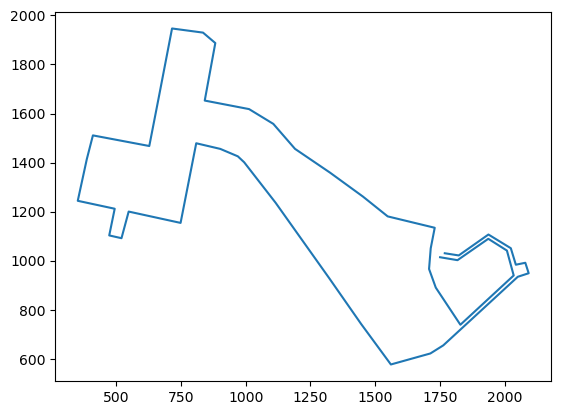

In [348]:
from FuncPack import coordinate_transformation as ct

route_raw = np.array([
  [40.599284,140.480903],
  [40.599204,140.481541],
  [40.599971,140.482897],
  [40.599468, 140.48392],
  [40.598863,140.484149],
  [40.598934,140.484582],
  [40.598550,140.484735],
  [40.59842,140.484237],
  [40.595905,140.480834],
  [40.595608,140.480244],
  [40.595204,140.47844],
  [40.596692,140.47708],
  [40.598374,140.475621],
  [40.599873,140.474295],
  [40.601136,140.473178],
  [40.602623,140.471741],
  [40.602841,140.471452],
  [40.603114,140.47065],
  [40.603321,140.469551],
  [40.600399,140.468836],
  [40.600815,140.466465],
  [40.599838,140.466137],
  [40.599940,140.465577],
  [40.600919,140.465827],
  [40.60121,140.46414],
  [40.602739,140.464553],
  [40.60361,140.464832],
  [40.60322,140.467407],
  [40.605016,140.467843],
  [40.607532,140.468447],
  [40.60738,140.469862],
  [40.606997,140.470423],
  [40.604887,140.46994],
  [40.604574,140.471965],
  [40.604031,140.473073],
  [40.603115,140.474063],
  [40.602241,140.475665],
  [40.601364,140.477166],
  [40.600637,140.478296],
  [40.600219,140.480444],
  [40.599465,140.480261],
  [40.598707,140.480185],
  [40.598023,140.480492],
  [40.596661,140.481615],
  [40.598469,140.484051],
  [40.599382,140.483741],
  [40.599814,140.482891],
  [40.599030,140.481484],
  [40.599138,140.480689]])

#原点の設定
p0 = 40.59, 140.46

route = []
for p in route_raw:
    xy = ct.calc_xy(p[0], p[1], p0[0], p0[1])
    route.append(xy)

route = np.array(route)
plt.figure(dpi=100)
# plt.xlim(0,2100)
# plt.ylim(0,2000)
plt.plot(route[:,1], route[:,0])
plt.show()

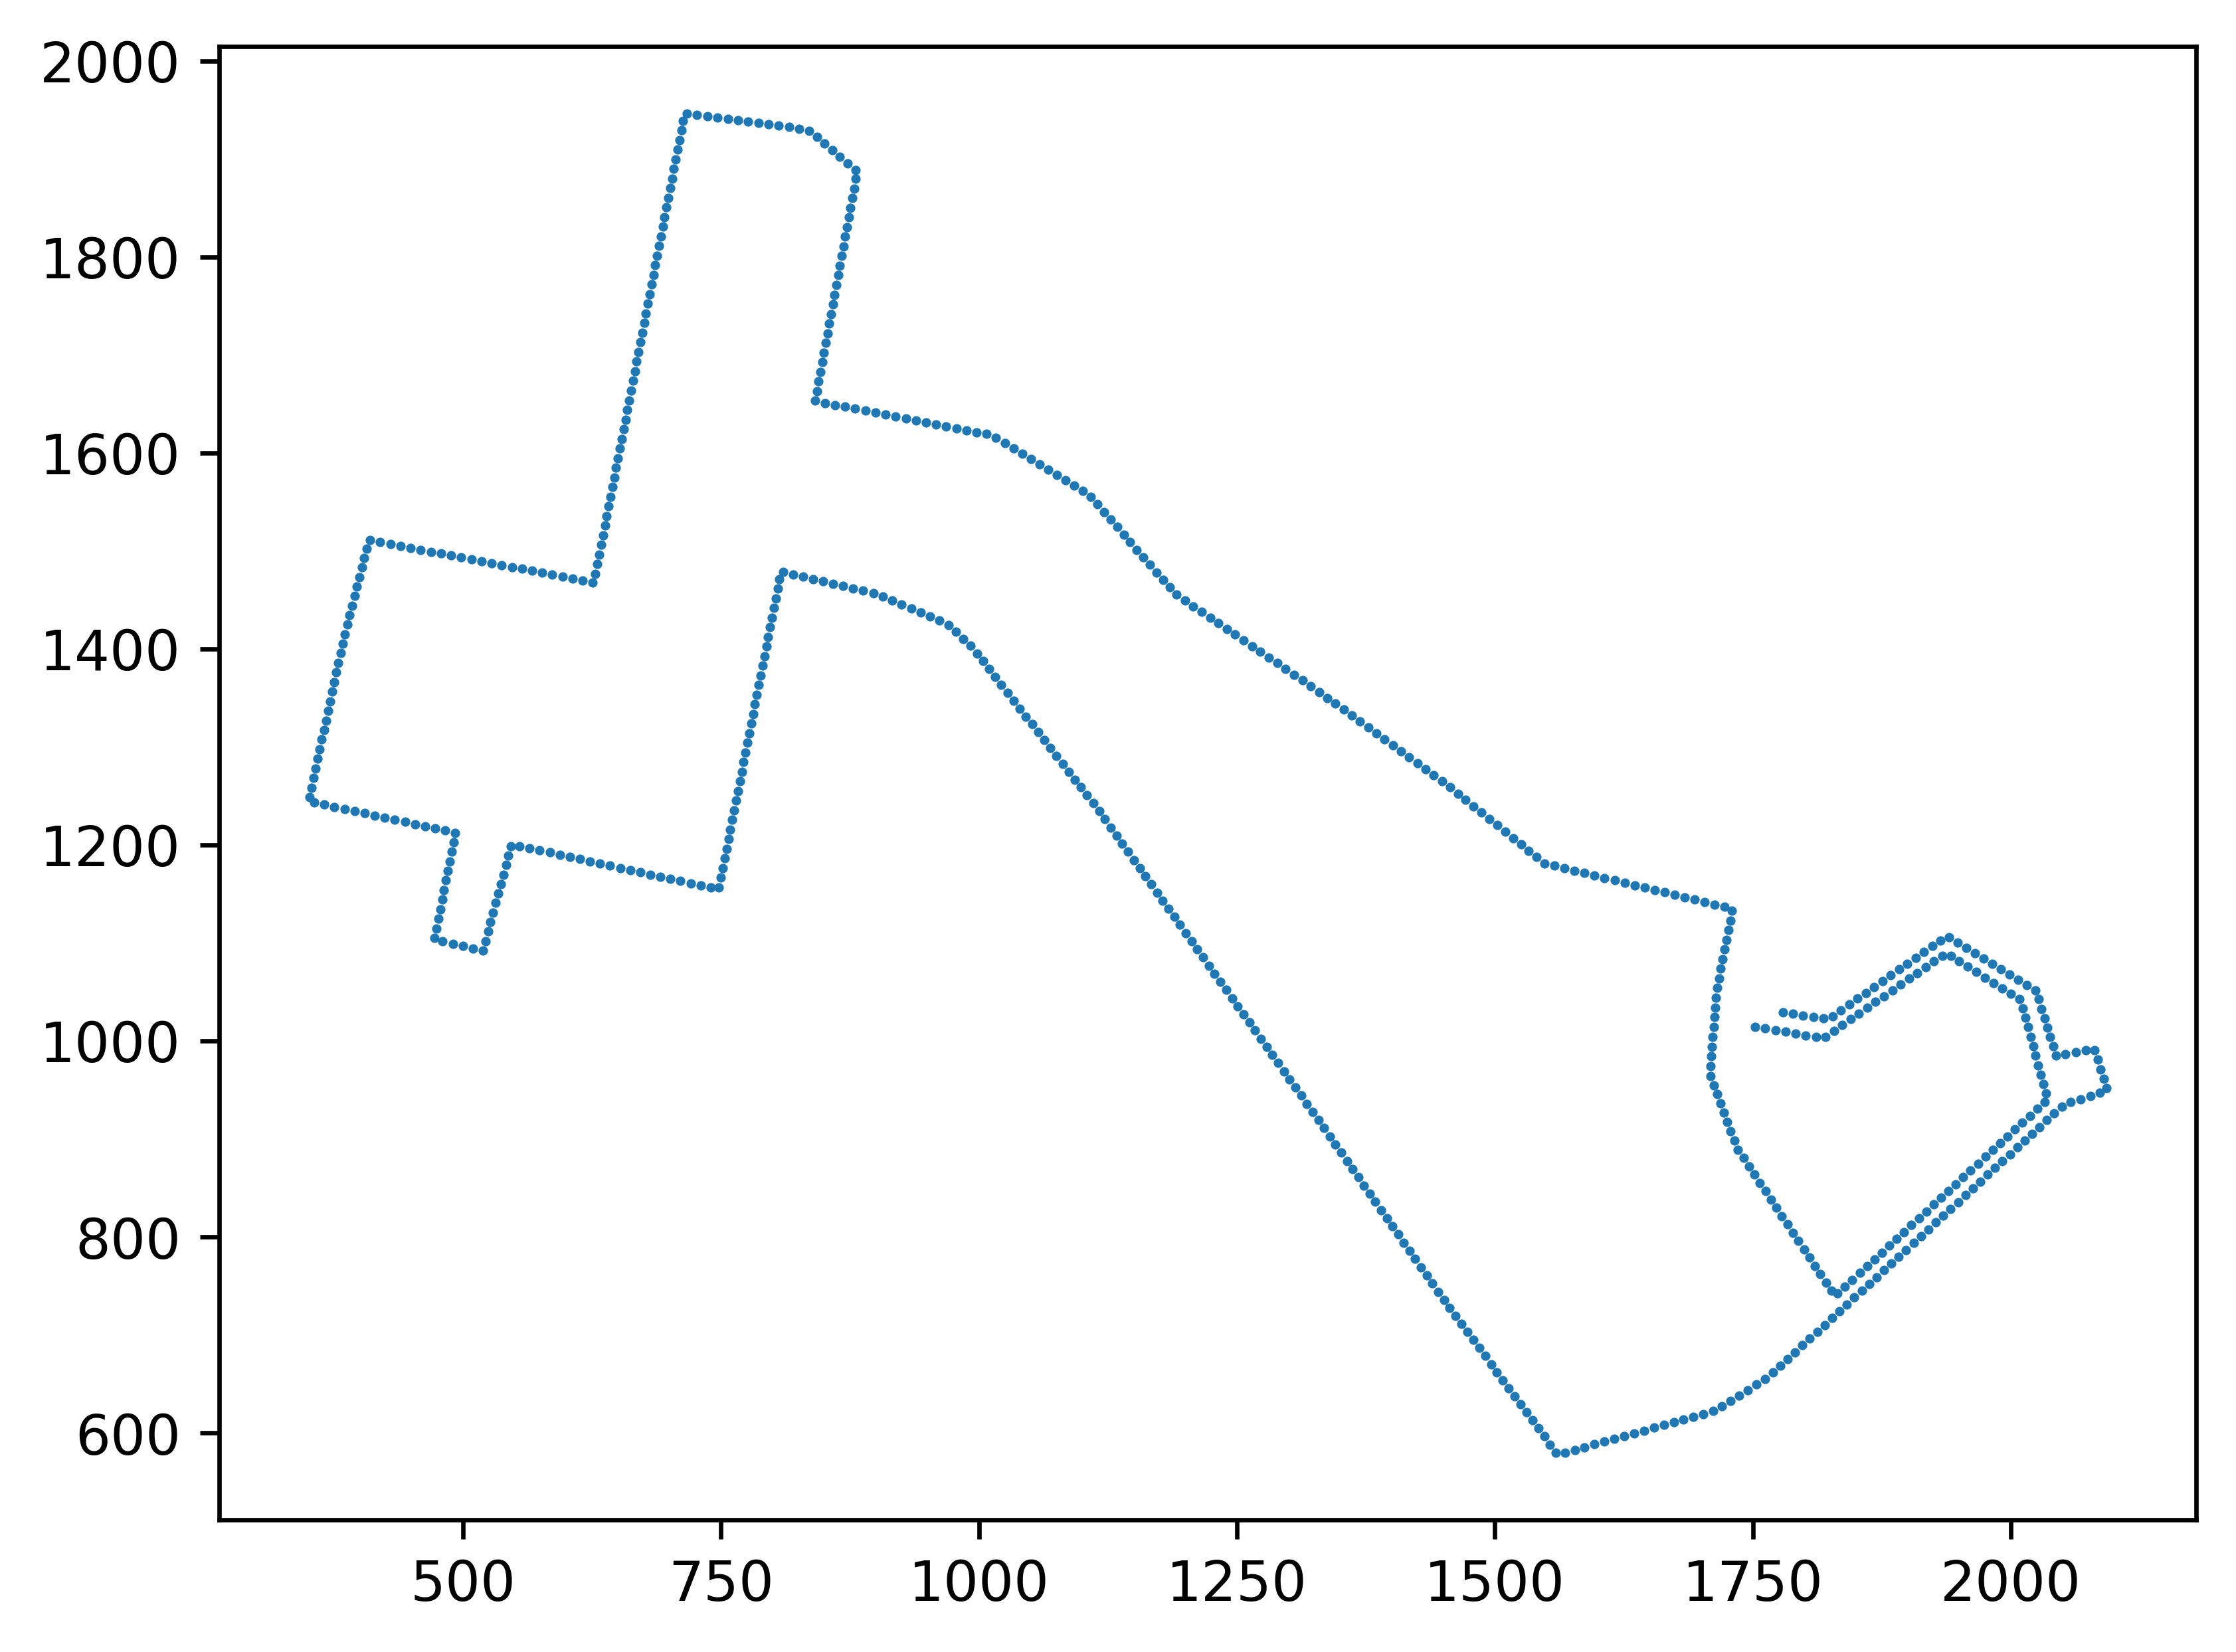

In [349]:
lattice = []
res = 0 # 余りの距離
dx = 10 # 10m刻み

for i in range(1, route.shape[0]):
    p1 = route[i-1,:]
    p2 = route[i,:]
    x = p1 + (dx-res)*(p2-p1)/np.linalg.norm(p2-p1)
    lattice.append(x)
    res = 0
    
    while True:
        if np.linalg.norm(x-p2) > dx:
            x = x + dx*(p2-p1)/np.linalg.norm(p2-p1)
        else:
            res = np.linalg.norm(x-p2)
            break
        lattice.append(x)

lattice = np.array(lattice)
plt.figure(dpi=600)
plt.scatter(lattice[:,1], lattice[:,0], s=0.5)
# plt.savefig('bus_route.png', format='png', dpi=600)

In [350]:
key1 = [f"{k}" for k in range(len(route)+2)]
key2 = [[f"{k}"] if k!=len(route) else ["0"] for k in range(1,len(route)+1)]

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
def add(*args):
    s = 0
    
    for x in args:
        s += x
        
    return s

dictionary = {}
keys = key1
values1 = route.tolist()
values2 = key2

for key, value1, values2 in zip(keys, values1, values2):
    dictionary[key] = value1, values2

dictionary

{'0': ([1031.058728654869, 1769.108771070599], ['1']),
 '1': ([1022.1889386447147, 1823.1075670449675], ['2']),
 '2': ([1107.3818019684404, 1937.849537549795], ['3']),
 '3': ([1051.5541784297675, 2024.4446167787542], ['4']),
 '4': ([984.3832547431812, 2043.8442219253916], ['5']),
 '5': ([992.276885682717, 2080.488861570708], ['6']),
 '6': ([949.643050391227, 2093.449940924178], ['7']),
 '7': ([935.1967718591914, 2051.3056193128227], ['8']),
 '8': ([655.8699628477916, 1763.3577893391077], ['9']),
 '9': ([622.8809196250513, 1713.4286763784569], ['10']),
 '10': ([577.9892417918891, 1560.7496026144513], ['11']),
 '11': ([743.186107638292, 1445.6080373044517], ['12']),
 '12': ([929.9241016283631, 1322.088829306671], ['13']),
 '13': ([1096.346595555544, 1209.835328774176], ['14']),
 '14': ([1236.5691646467894, 1115.2787616482653], ['15']),
 '15': ([1401.6611715862527, 993.6407473324609], ['16']),
 '16': ([1425.863608875312, 969.1795306247279], ['17']),
 '17': ([1456.1676815655082, 901.302829

In [351]:
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching import visualization as mmviz

map_con = InMemMap("mymap", graph=dictionary, use_latlon=False)

mmviz.plot_map(map_con, show_labels=True, show_graph=True, filename="fig/route_graph.png")


(None, None)

In [352]:
names = ['phone_id','lat','lon','date','NA']
bus = pd.read_csv("data/bus_data.csv",header=None,names=names, usecols=[0,1,2,3])
bus = bus.dropna(subset=['phone_id','lat','lon','date'])
bus['date'] = pd.to_datetime(bus['date'])
len(bus),print(bus.dtypes)

phone_id            object
lat                float64
lon                float64
date        datetime64[ns]
dtype: object


(210626, None)

In [353]:
bus25=bus[(bus['date'] >= dt.datetime(2021,12,25)) & (bus['date'] < dt.datetime(2021,12,26))].reset_index(drop=True)
len(bus25)

22036

In [354]:
bus25

,phone_id,lat,lon,date
0,phone1,40.594942,140.473692,2021-12-25 10:42:15
1,phone1,40.594942,140.473692,2021-12-25 10:42:20
2,phone1,40.594895,140.473643,2021-12-25 10:42:25
3,phone1,40.594895,140.473643,2021-12-25 10:42:30
4,phone1,40.594915,140.473651,2021-12-25 10:42:35
...,...,...,...,...
22031,phone6,40.597195,140.476659,2021-12-25 16:59:54
22032,phone5,40.602259,140.469111,2021-12-25 16:59:56
22033,phone3,40.586484,140.476878,2021-12-25 16:59:56
22034,phone1,40.598421,140.484151,2021-12-25 16:59:58


In [355]:
p0

(40.59, 140.46)

In [356]:
bus25_ll = bus25.iloc[:,1:3]
bus25_ll_list = bus25_ll.to_numpy().tolist()

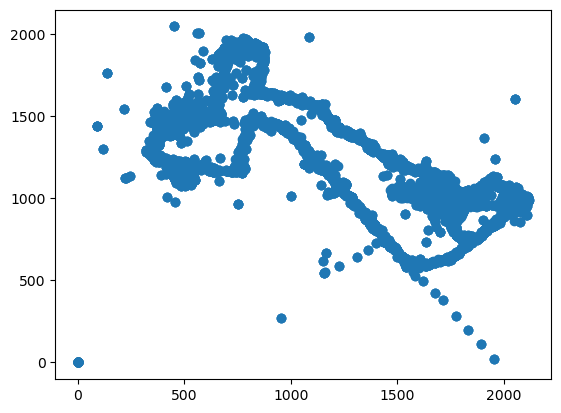

In [357]:
p_max = 40.61, 140.49
bus25_ll = []
for p in bus25_ll_list:
    if p[0]<p0[0] or p[1]<p0[1] or p[0]>p_max[0] or p[1]>p_max[1]:
        xy = (0,0)
    else:
        xy = ct.calc_xy(p[0], p[1], p0[0], p0[1])
    bus25_ll.append(xy)

bus25_ll = np.array(bus25_ll)
plt.figure(dpi=100)
# plt.xlim(0,2100)
# plt.ylim(0,2000)
plt.scatter(bus25_ll[:,1], bus25_ll[:,0])
plt.show()

In [358]:
df_xy = pd.DataFrame(bus25_ll, columns=['y', 'x'])
bus25 = pd.concat([bus25, df_xy], axis=1)
bus25

,phone_id,lat,lon,date,y,x
0,phone1,40.594942,140.473692,2021-12-25 10:42:15,548.835852,1158.878028
1,phone1,40.594942,140.473692,2021-12-25 10:42:20,548.835852,1158.878028
2,phone1,40.594895,140.473643,2021-12-25 10:42:25,543.594353,1154.706104
3,phone1,40.594895,140.473643,2021-12-25 10:42:30,543.594353,1154.706104
4,phone1,40.594915,140.473651,2021-12-25 10:42:35,545.870681,1155.416725
...,...,...,...,...,...,...
22031,phone6,40.597195,140.476659,2021-12-25 16:59:54,799.007685,1409.939707
22032,phone5,40.602259,140.469111,2021-12-25 16:59:56,1361.251341,771.110360
22033,phone3,40.586484,140.476878,2021-12-25 16:59:56,0.000000,0.000000
22034,phone1,40.598421,140.484151,2021-12-25 16:59:58,935.305804,2044.018490


In [359]:
bus_1 = bus25[bus25['phone_id']=='phone1'].reset_index(drop=True)
bus_1 = bus_1.iloc[121:].reset_index(drop=True)
path_1 = bus_1.iloc[:,4:6].to_numpy().tolist()
path_1

[[977.8059559985995, 2069.498839065444],
 [977.8059559985995, 2069.498839065444],
 [977.8059559985995, 2069.498839065444],
 [989.2218004055321, 2074.6753115000206],
 [989.2218004055321, 2074.6753115000206],
 [989.2218004055321, 2074.6753115000206],
 [984.0346092572436, 2068.0075376773],
 [984.0346092572436, 2068.0075376773],
 [984.0346092572436, 2068.0075376773],
 [994.4954123022035, 2072.6849294669264],
 [994.4954123022035, 2072.6849294669264],
 [994.4954123022035, 2072.6849294669264],
 [1005.4345499752089, 2080.5190417484164],
 [1005.4345499752089, 2080.5190417484164],
 [1005.4345499752089, 2080.5190417484164],
 [950.9668611362576, 2062.574676399802],
 [950.9668611362576, 2062.574676399802],
 [950.9668611362576, 2062.574676399802],
 [928.156048742123, 2047.3043039472088],
 [928.156048742123, 2047.3043039472088],
 [928.156048742123, 2047.3043039472088],
 [934.2616712087765, 2042.5461219644121],
 [934.2616712087765, 2042.5461219644121],
 [934.2616712087765, 2042.5461219644121],
 [937.2

In [360]:
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap

map_con = InMemMap("mymap", graph=dictionary
, use_latlon=False)

path = path_1

matcher = DistanceMatcher(map_con, obs_noise=50, min_prob_norm=0.5, max_lattice_width=5)
states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()

Searching closeby nodes with linear search, use an index and set max_dist


States
------
[('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('4', '5'), ('5', '6'), ('6', '7'), ('6', '7'), ('6', '7'), ('6', '7'), ('6', '7'), ('6', '7'), ('6', '7'), ('6', '7'), ('6', '7'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('7', '8'), ('8', '9'), ('8', '9'), ('8', '9'), ('8', '9'), ('8', '9'), ('8', '9'), ('9', '10'), ('9', '10'), ('9', '10'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('10', '11'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11', '12'), ('11',

In [361]:
from leuvenmapmatching import visualization as mmviz
plt.figure(dpi=600)
mmviz.plot_map(map_con, matcher=matcher,
               show_labels=True, show_matching=True, show_graph=True,
               filename="bus_1.png")


(None, None)

<Figure size 3840x2880 with 0 Axes>

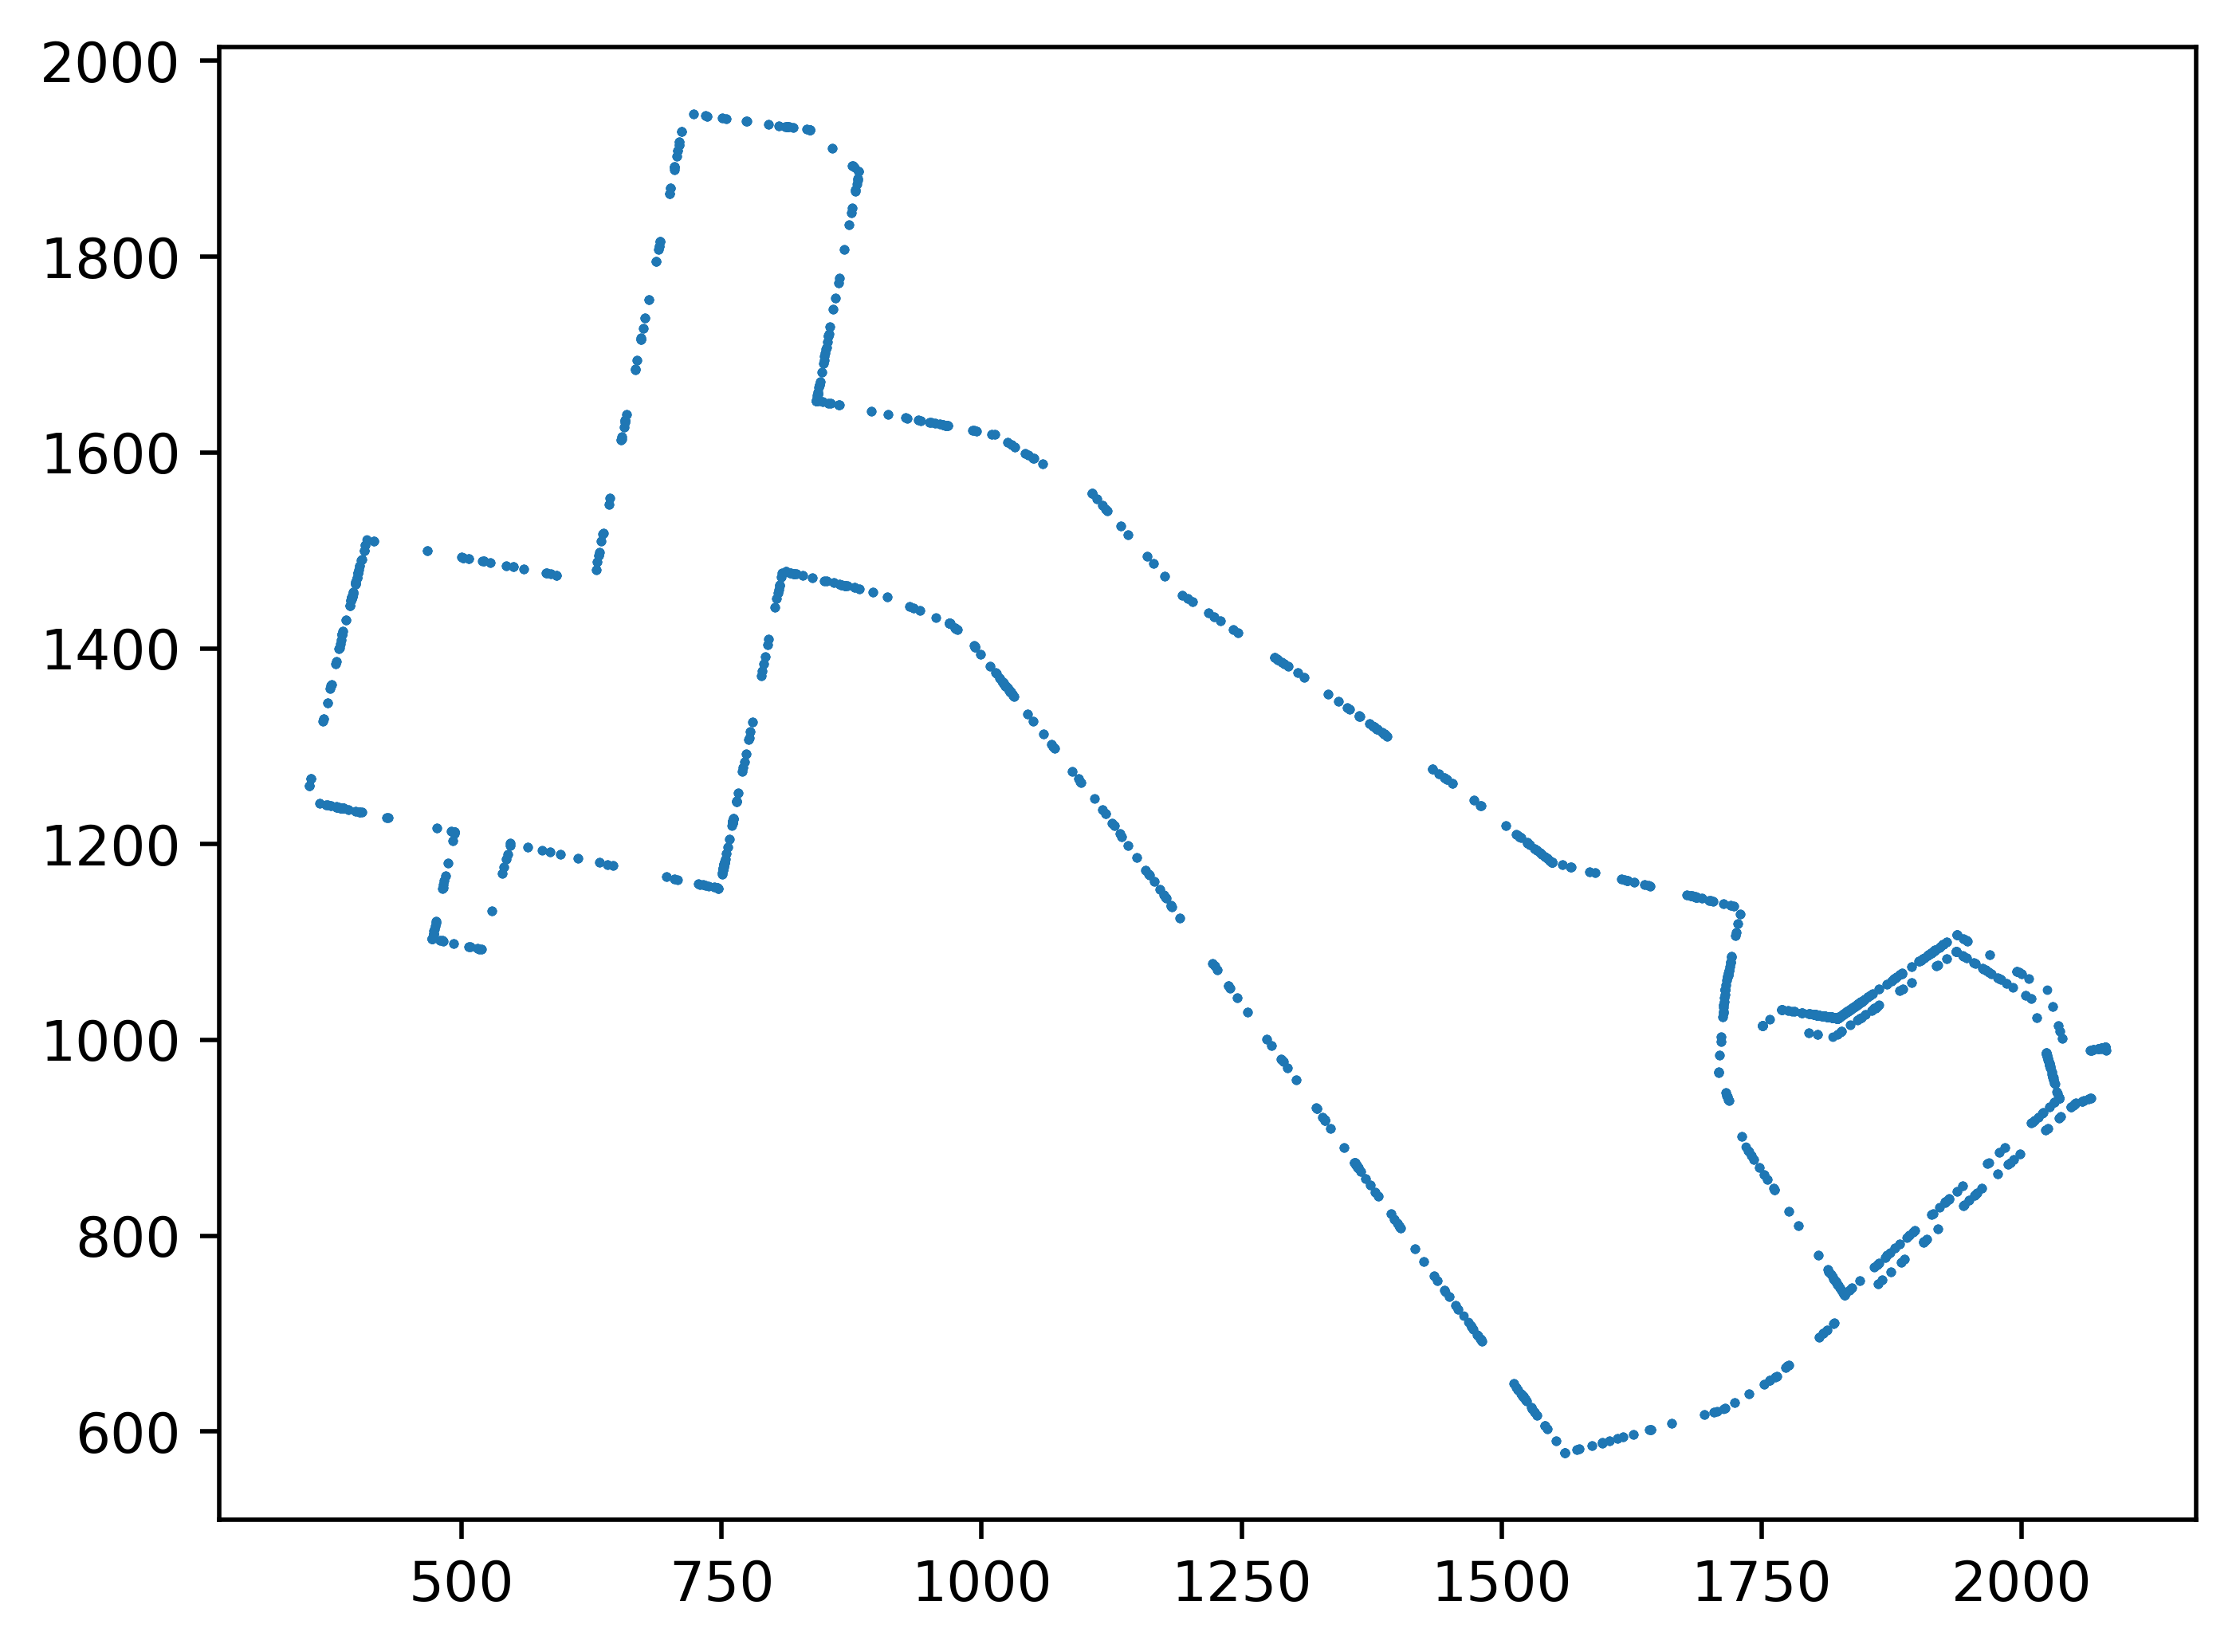

In [362]:
length = len(matcher.lattice_best)
match_result = [matcher.lattice_best[i].edge_m.pi for i in range(length)]
y, x = zip(*match_result)
plt.figure(dpi=500)
plt.scatter(x, y, s=0.5)
plt.savefig('bus_1_match.png')
plt.show()

In [363]:
lattice_0 = pd.read_csv('../../data/bus_route.csv', usecols=[1,2])
lattice_0 = lattice_0.to_numpy()

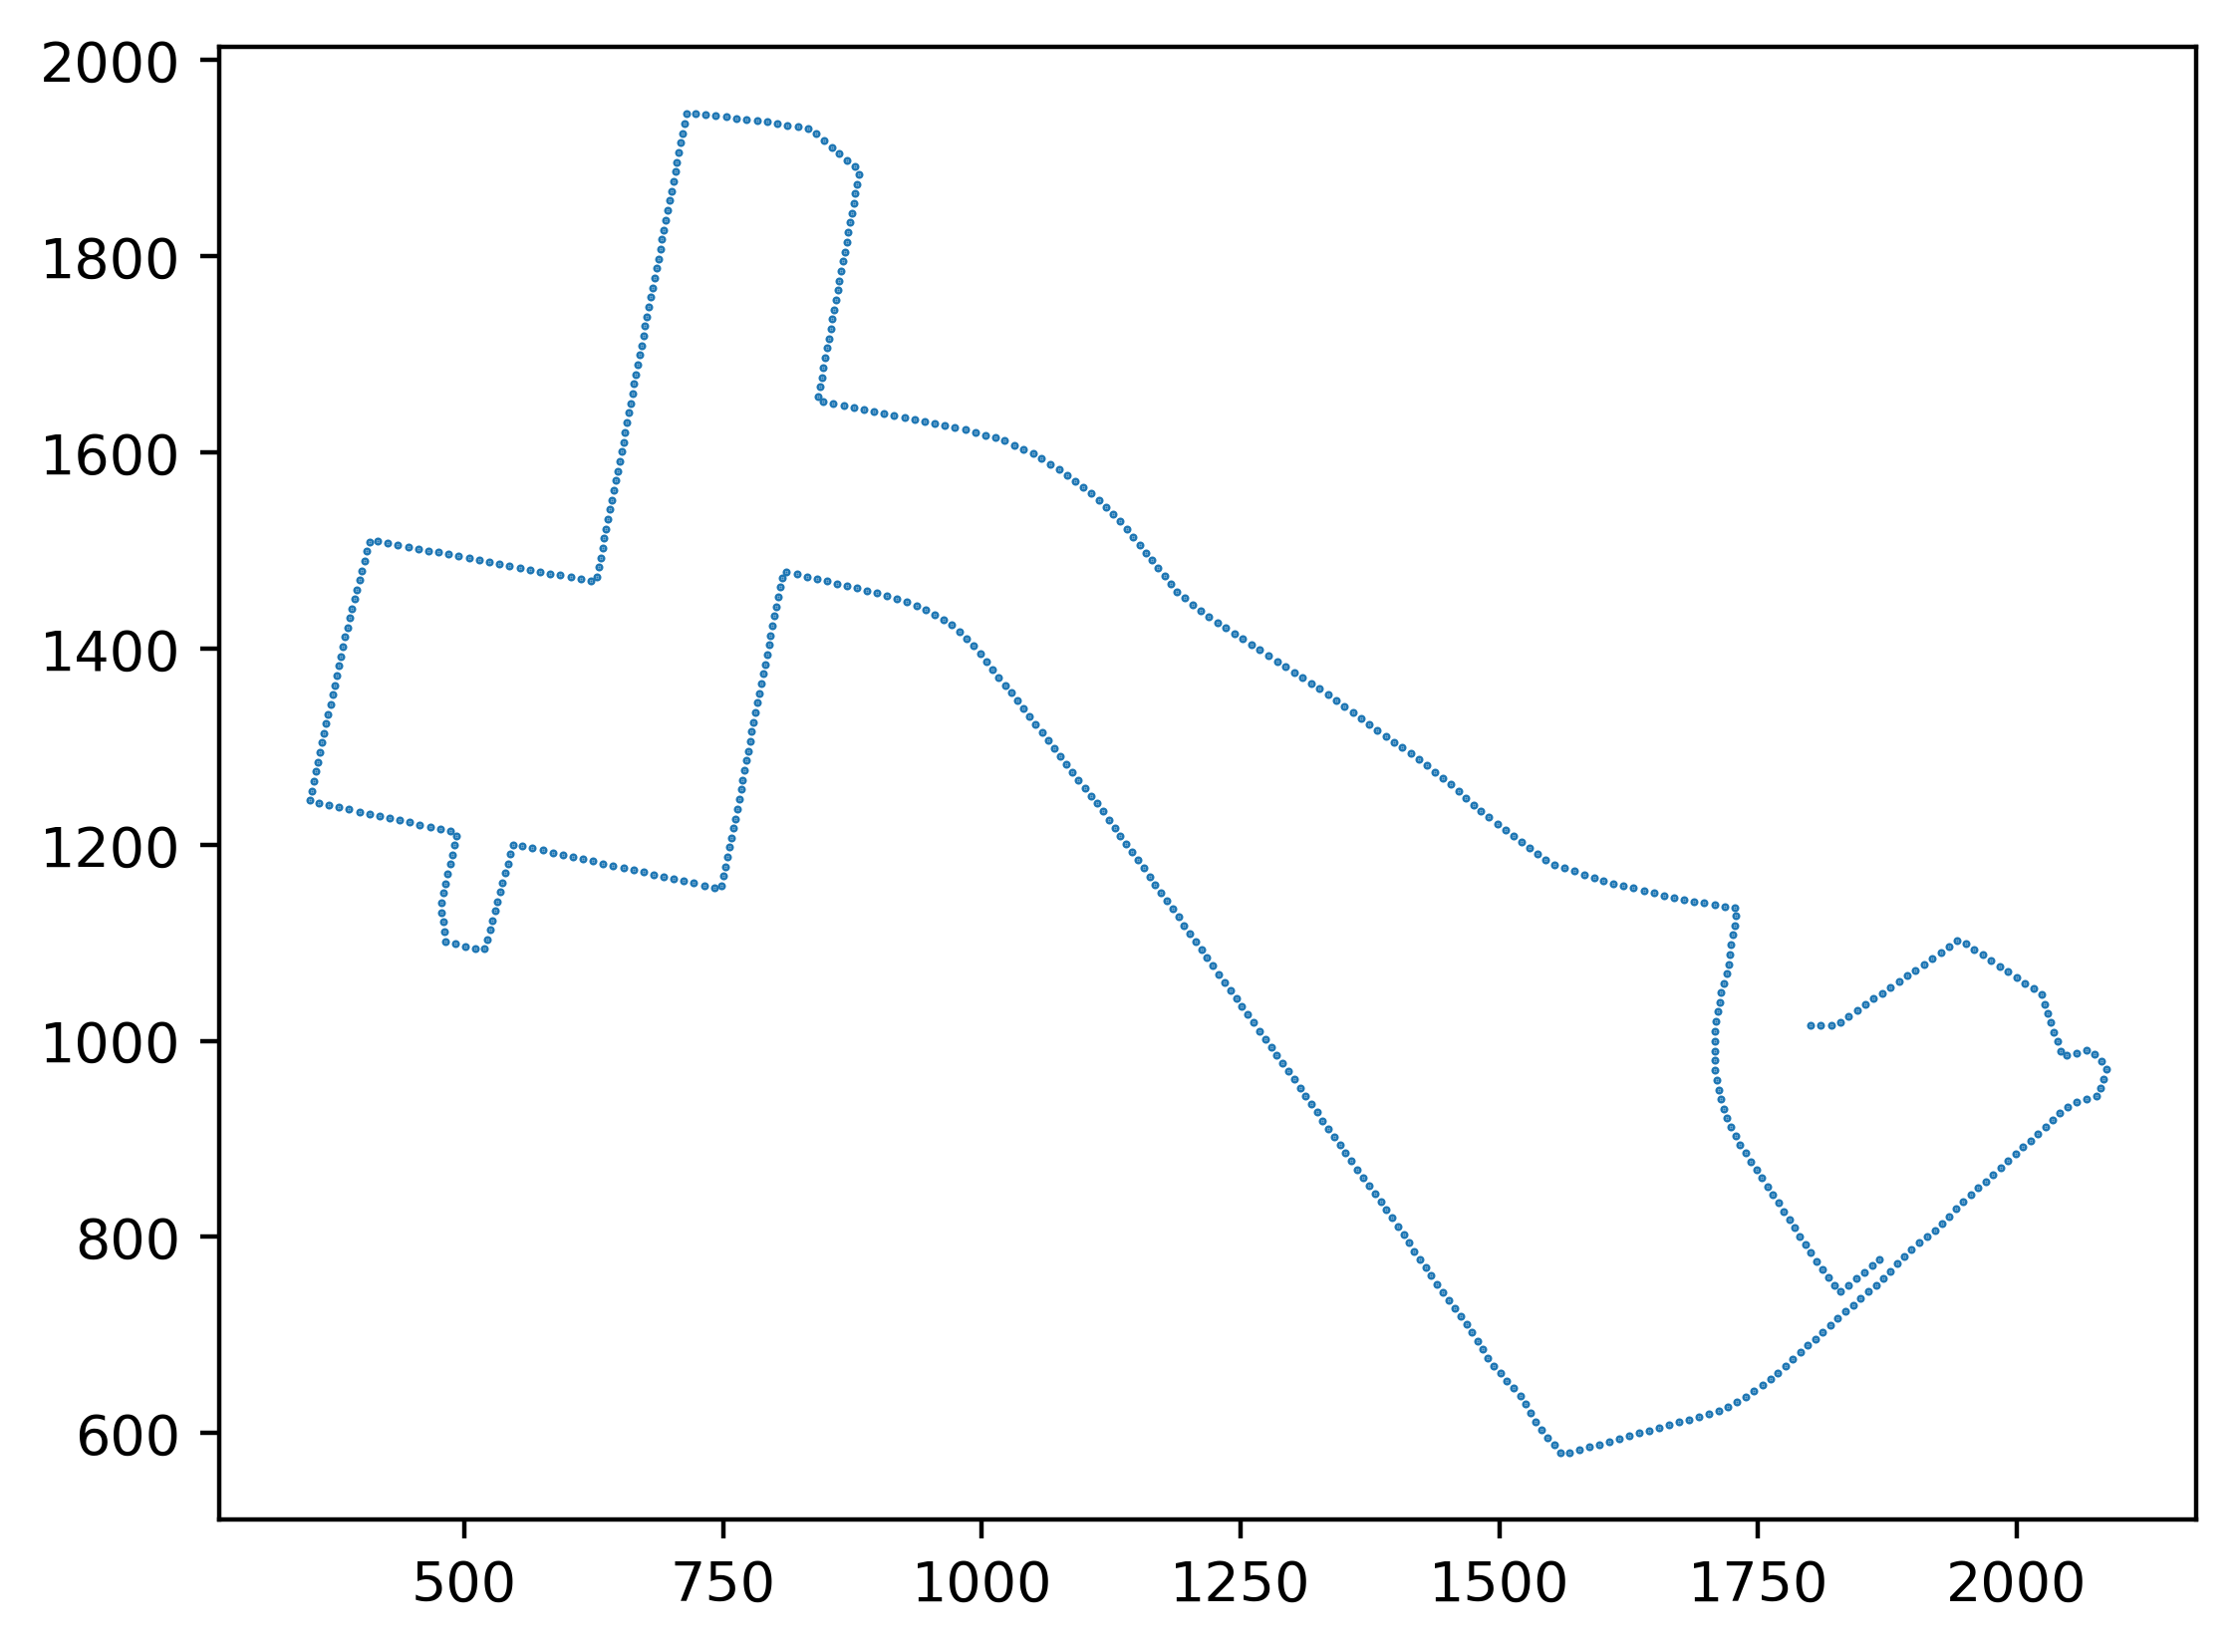

In [364]:
lattice_0_xy = []
for p in lattice_0:
    xy = ct.calc_xy(p[0], p[1], p0[0], p0[1])
    lattice_0_xy.append(xy)

lattice_0_xy = np.array(lattice_0_xy)
plt.figure(dpi=400)
# plt.xlim(0,2100)
# plt.ylim(0,2000)
plt.scatter(lattice_0_xy[:,1], lattice_0_xy[:,0], s=0.2)
plt.show()

In [365]:
nos = []
for i in range(0, length):
    no = ((lattice_0_xy - match_result[i])**2).sum(axis=1).argmin()
    nos.append(no)

In [366]:
nos_df = pd.DataFrame(nos, columns=['nos'])
bus_1 = pd.concat([bus_1, nos_df], axis=1)
bus_1 = bus_1[:4370]

In [367]:
bus_1

,phone_id,lat,lon,date,y,x,nos
0,phone1,40.598804,140.484452,2021-12-25 10:52:21,977.805956,2069.498839,36
1,phone1,40.598804,140.484452,2021-12-25 10:52:26,977.805956,2069.498839,36
2,phone1,40.598804,140.484452,2021-12-25 10:52:31,977.805956,2069.498839,36
3,phone1,40.598906,140.484513,2021-12-25 10:52:36,989.221800,2074.675312,37
4,phone1,40.598906,140.484513,2021-12-25 10:52:41,989.221800,2074.675312,37
...,...,...,...,...,...,...,...
4365,phone1,40.598546,140.484206,2021-12-25 16:59:38,949.175375,2048.720399,45
4366,phone1,40.598862,140.484304,2021-12-25 16:59:43,984.253618,2056.945716,33
4367,phone1,40.598862,140.484304,2021-12-25 16:59:48,984.253618,2056.945716,33
4368,phone1,40.598862,140.484304,2021-12-25 16:59:53,984.253618,2056.945716,33


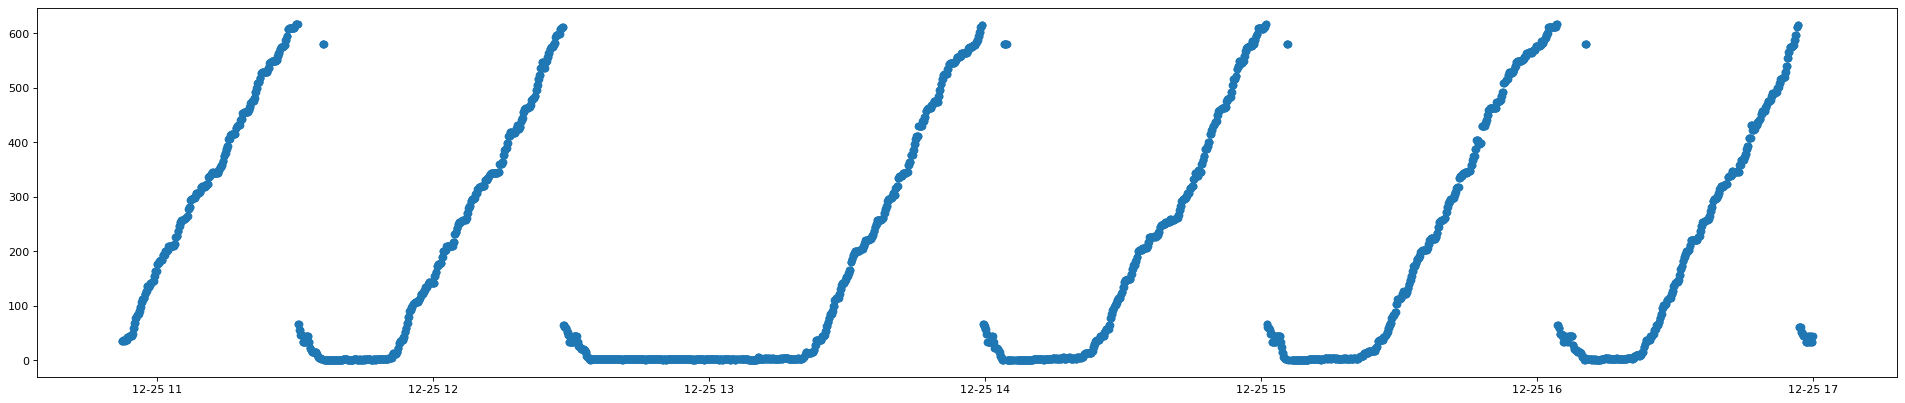

In [368]:
plt.figure(figsize=(30, 6), dpi=80)
plt.scatter(bus_1['date'], bus_1['nos'])
plt.show()

In [369]:
nos = []
for i in range(0, length):
    no = ((lattice - match_result[i])**2).sum(axis=1).argmin()
    nos.append(no)

In [370]:
nos_df = pd.DataFrame(nos, columns=['nos2'])
bus_1 = pd.concat([bus_1, nos_df], axis=1)
bus_1 = bus_1[:4370]

In [371]:
bus_1

,phone_id,lat,lon,date,y,x,nos,nos2
0,phone1,40.598804,140.484452,2021-12-25 10:52:21,977.805956,2069.498839,36,38
1,phone1,40.598804,140.484452,2021-12-25 10:52:26,977.805956,2069.498839,36,38
2,phone1,40.598804,140.484452,2021-12-25 10:52:31,977.805956,2069.498839,36,38
3,phone1,40.598906,140.484513,2021-12-25 10:52:36,989.221800,2074.675312,37,39
4,phone1,40.598906,140.484513,2021-12-25 10:52:41,989.221800,2074.675312,37,39
...,...,...,...,...,...,...,...,...
4365,phone1,40.598546,140.484206,2021-12-25 16:59:38,949.175375,2048.720399,45,645
4366,phone1,40.598862,140.484304,2021-12-25 16:59:43,984.253618,2056.945716,33,648
4367,phone1,40.598862,140.484304,2021-12-25 16:59:48,984.253618,2056.945716,33,648
4368,phone1,40.598862,140.484304,2021-12-25 16:59:53,984.253618,2056.945716,33,648


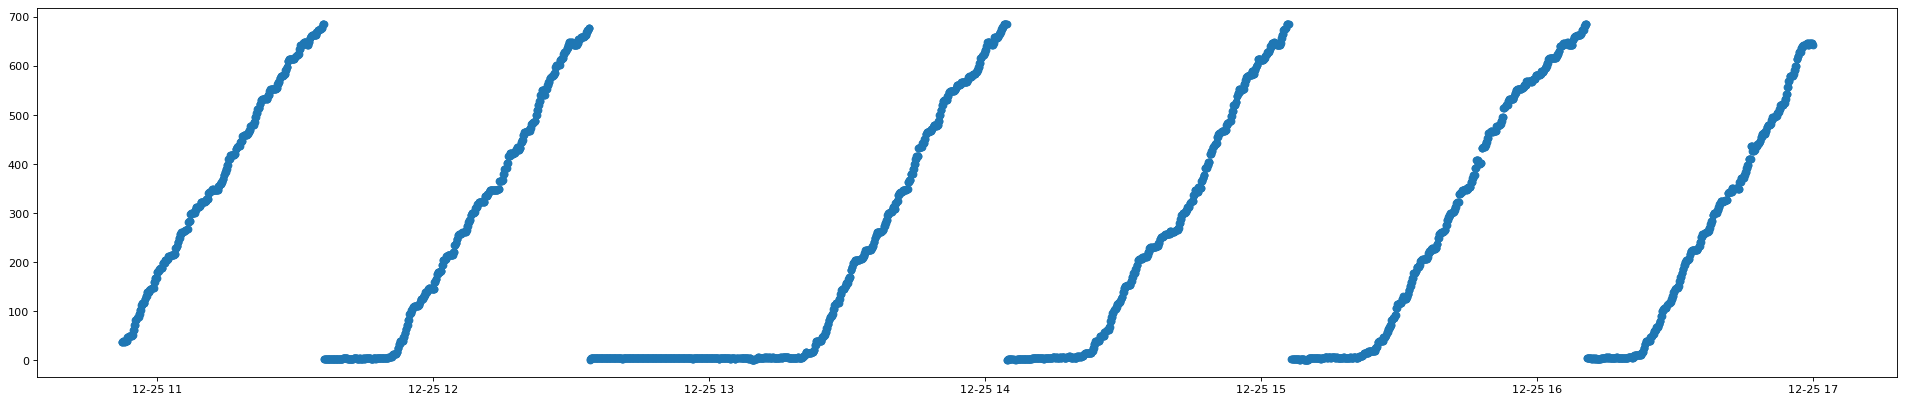

In [372]:
plt.figure(figsize=(30, 6), dpi=80)
plt.scatter(bus_1['date'], bus_1['nos2'])
plt.savefig('timespace.png')
plt.show()

In [373]:
lattice

array([[1029.43785915, 1778.97653587],
       [1027.81698965, 1788.84430066],
       [1026.19612015, 1798.71206546],
       ...,
       [1011.14276033, 1771.79312006],
       [1012.89500724, 1761.94783536],
       [1014.64725415, 1752.10255067]])

In [374]:
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching import visualization as mmviz

map_con = InMemMap("mymap", graph=dictionary
, use_latlon=False)

mmviz.plot_map(map_con, 
               show_labels=True, show_graph=True,
               filename="route.png")


(None, None)

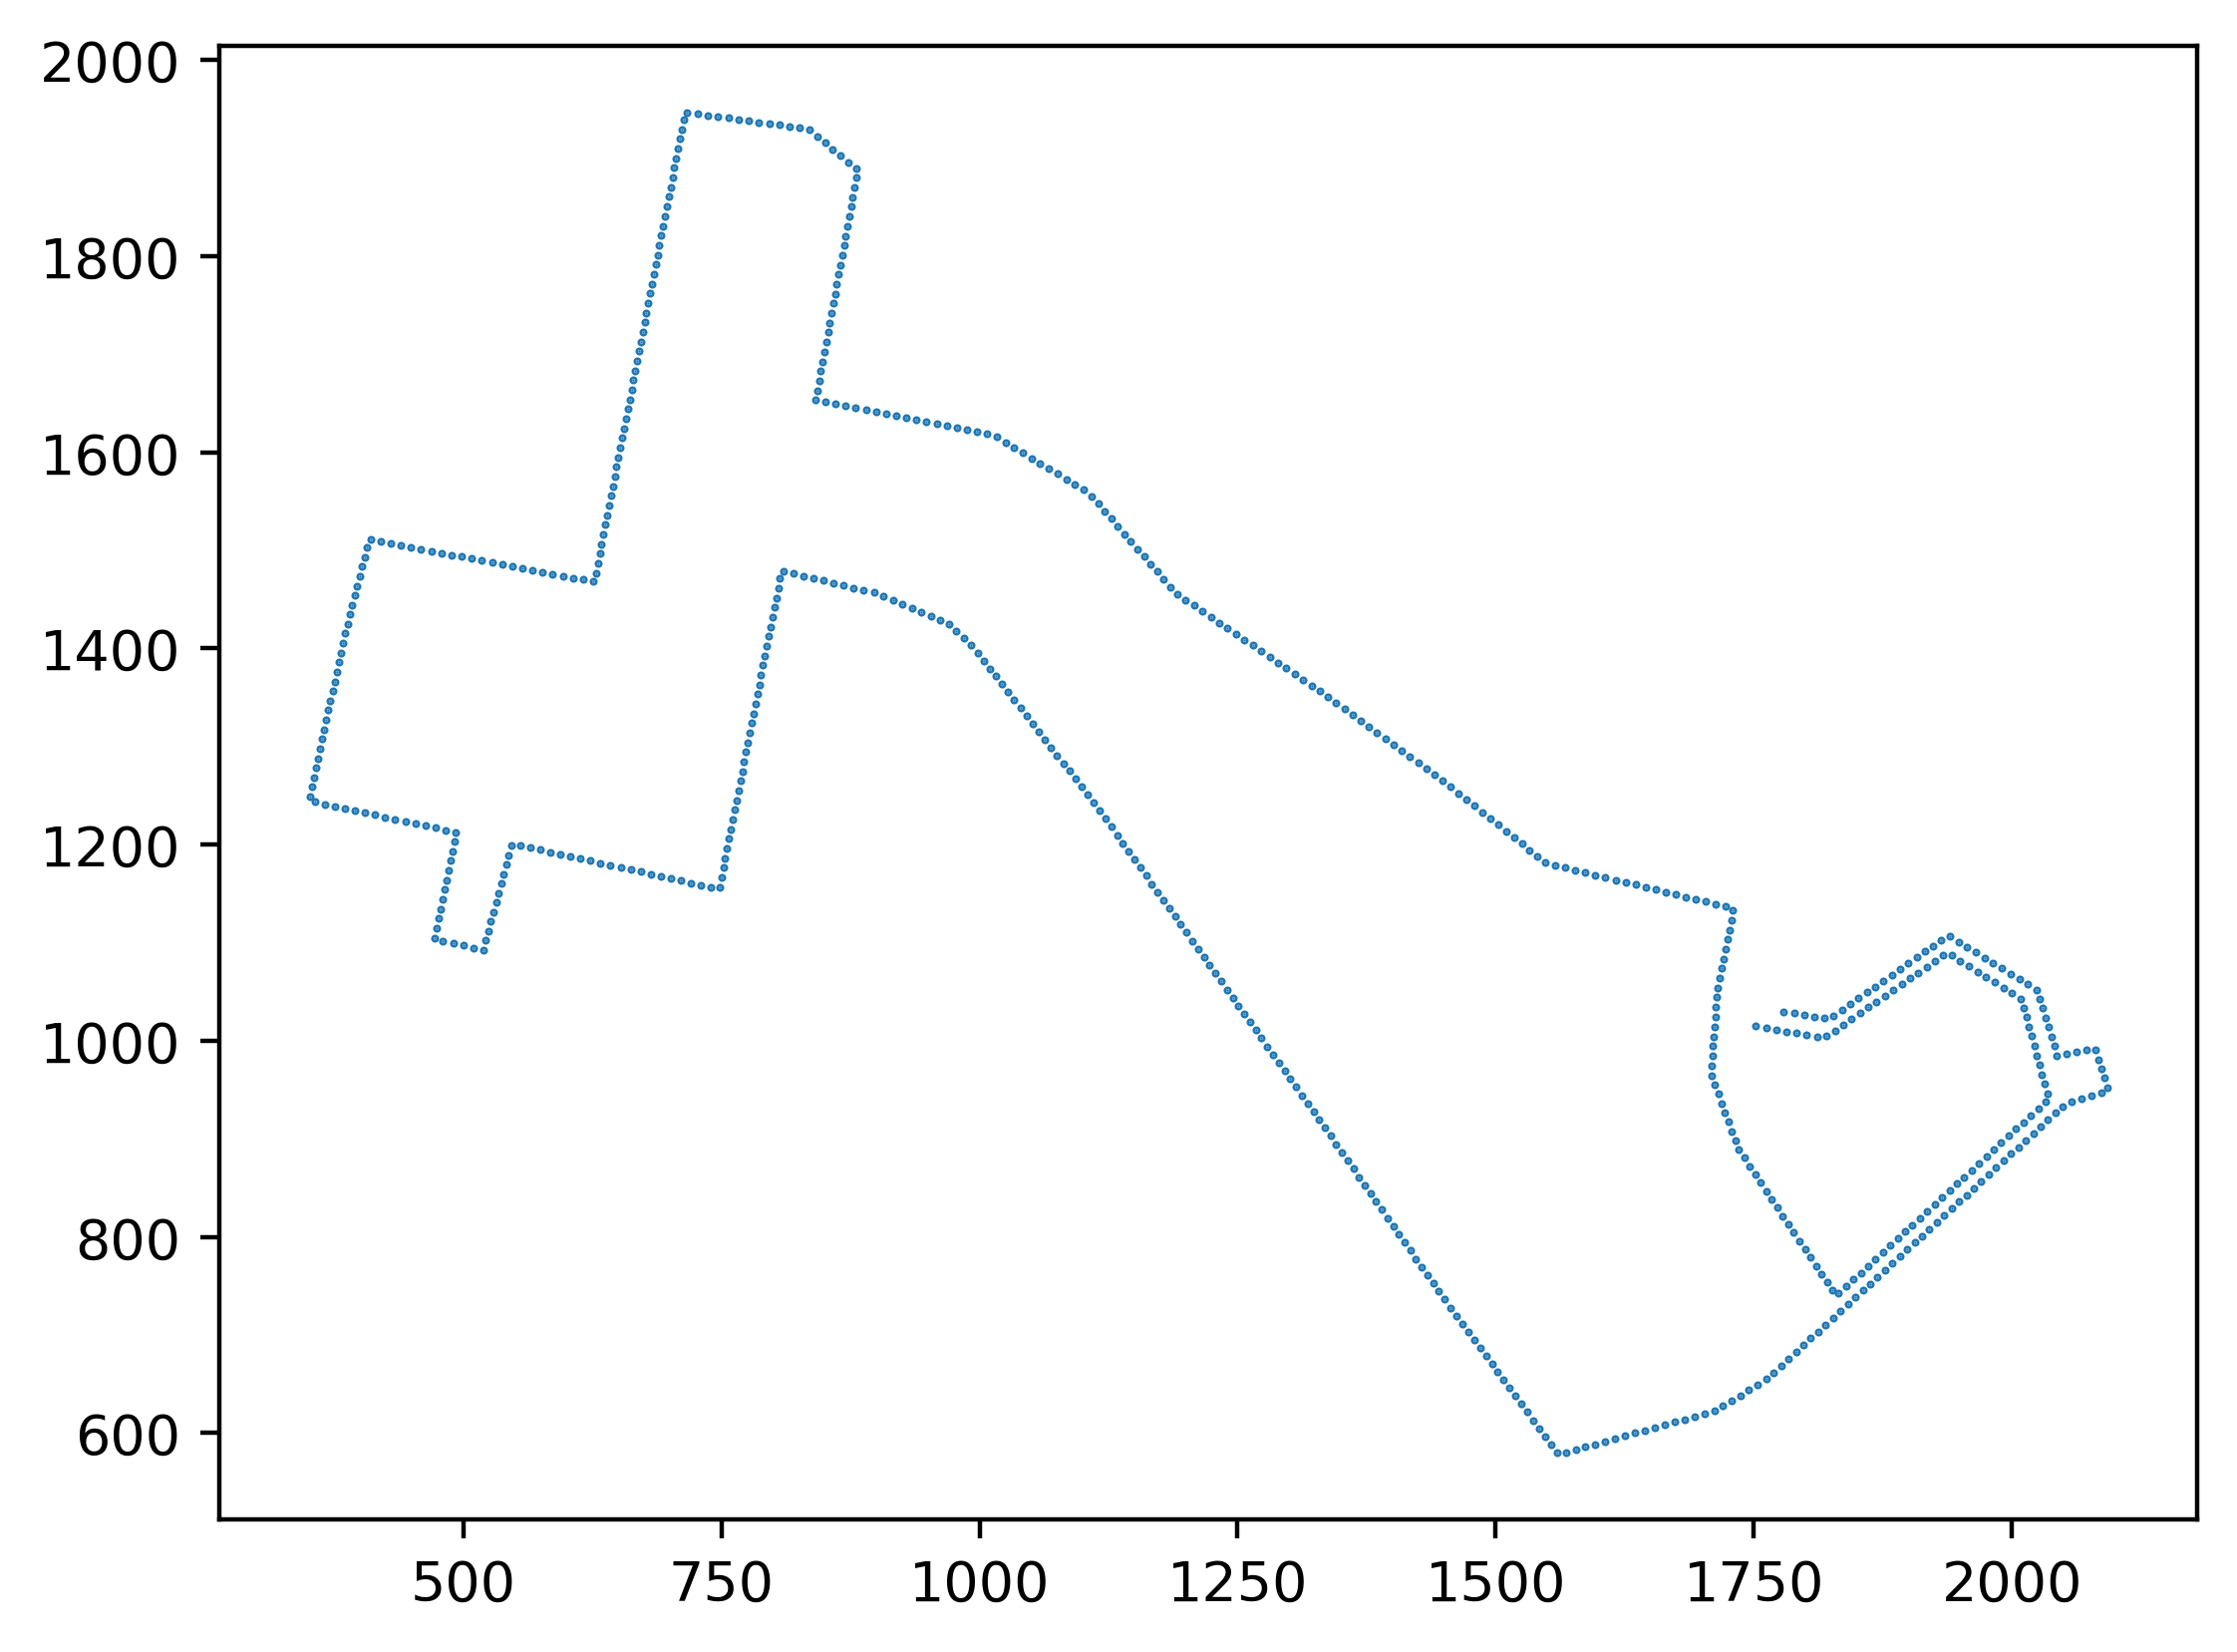

In [375]:
plt.figure(dpi=400)
# plt.xlim(0,2100)
# plt.ylim(0,2000)
plt.scatter(lattice[:,1], lattice[:,0], s=0.2)
plt.savefig('lattice.png')
plt.show()

In [391]:

lattice_ll = []
for p in lattice:
    ll = ct.calc_lat_lon(p[0], p[1], p0[0], p0[1])
    lattice_ll.append(ll)

lattice_ll = np.array(lattice_ll)

map1 = folium.Map(
   #初期位置の設定
   location=[40.601118,140.473144],
   #初期表示の拡大具合の設定
   zoom_start = 15,

   #地図のスタイルの選択 どれか一つ選んで#をはずしてください
   tiles = "OpenStreetMap"
   #tiles="cartodbpositron"
   #tiles = "Stamen Toner"
   #tiles = "Stamen Terrain"
)

for i in range(len(lattice_ll)):
    folium.Circle(
        radius=3,
        location=[lattice_ll[i][0], lattice_ll[i][1]],
        tooltip=str(i),
          #ドットの外枠の色を指定します
        color="green",
          #ドットを色埋めするかを設定します
        fill = True,        
          #色埋めする際の色を設定します
        fill_color = "lightgreen"
    ).add_to(map1)

line = folium.vector_layers.PolyLine(
            locations=lattice_ll,                   
            color='blue',                                  
            weight=1)  
map1.add_child(line)
#描画
map1

In [385]:
diff = np.array(bus_1['nos2'].diff())
diff_df = pd.DataFrame(diff, columns=['diff'])
bus_1 = pd.concat([bus_1, diff_df], axis=1)

In [386]:
bus_1

,phone_id,lat,lon,date,y,x,nos,nos2,diff
0,phone1,40.598804,140.484452,2021-12-25 10:52:21,977.805956,2069.498839,36,38,NaN
1,phone1,40.598804,140.484452,2021-12-25 10:52:26,977.805956,2069.498839,36,38,0.0
2,phone1,40.598804,140.484452,2021-12-25 10:52:31,977.805956,2069.498839,36,38,0.0
3,phone1,40.598906,140.484513,2021-12-25 10:52:36,989.221800,2074.675312,37,39,1.0
4,phone1,40.598906,140.484513,2021-12-25 10:52:41,989.221800,2074.675312,37,39,0.0
...,...,...,...,...,...,...,...,...,...
4365,phone1,40.598546,140.484206,2021-12-25 16:59:38,949.175375,2048.720399,45,645,0.0
4366,phone1,40.598862,140.484304,2021-12-25 16:59:43,984.253618,2056.945716,33,648,3.0
4367,phone1,40.598862,140.484304,2021-12-25 16:59:48,984.253618,2056.945716,33,648,0.0
4368,phone1,40.598862,140.484304,2021-12-25 16:59:53,984.253618,2056.945716,33,648,0.0


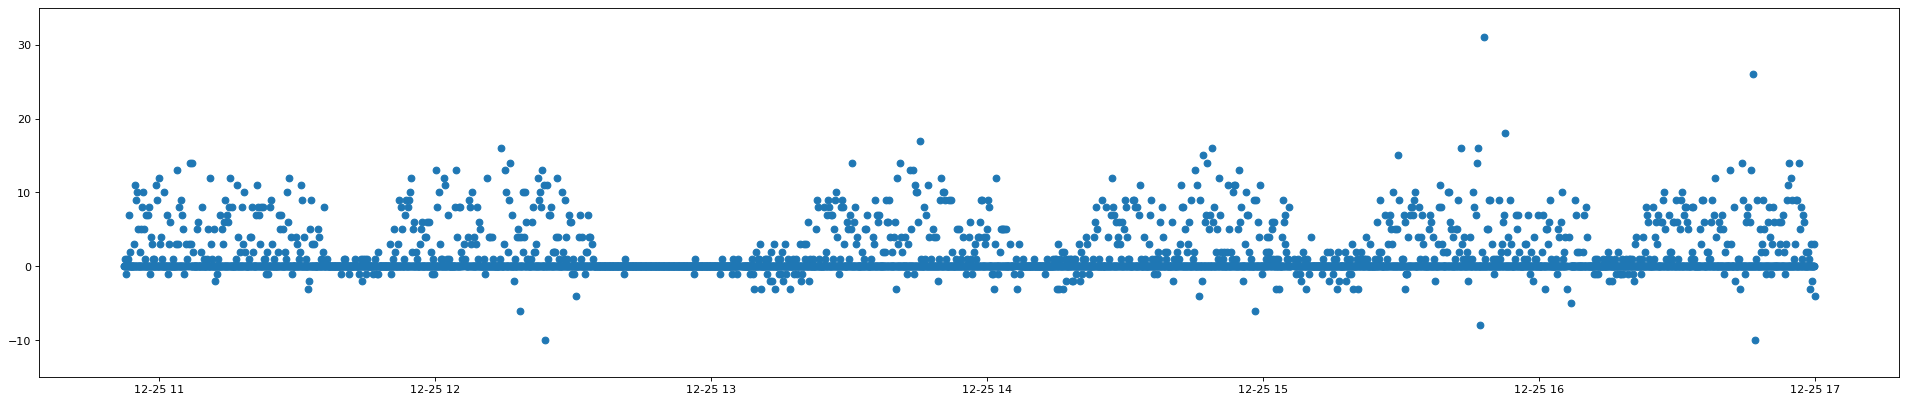

In [387]:
plt.figure(figsize=(30, 6), dpi=80)
plt.scatter(bus_1['date'], bus_1['diff'])
plt.ylim(-15,35)
plt.savefig('diff.png')
plt.show()

In [393]:
bus_1[bus_1['diff']<-3]

,phone_id,lat,lon,date,y,x,nos,nos2,diff
522,phone1,40.599300,140.481221,2021-12-25 11:36:21,1032.875045,1796.047402,0,2,-683.0
1023,phone1,40.607565,140.468930,2021-12-25 12:18:37,1950.324676,755.656329,424,429,-6.0
1088,phone1,40.601240,140.477026,2021-12-25 12:24:02,1248.194878,1440.906102,537,542,-10.0
1167,phone1,40.598490,140.484293,2021-12-25 12:30:37,943.003831,2056.000724,45,644,-4.0
1209,phone1,40.599164,140.481408,2021-12-25 12:34:07,1017.722579,1811.835363,0,0,-678.0
2290,phone1,40.599299,140.480983,2021-12-25 14:04:48,1032.770279,1775.879100,0,0,-685.0
2778,phone1,40.602518,140.464494,2021-12-25 14:46:10,1389.968139,380.310856,339,344,-4.0
2924,phone1,40.599194,140.480634,2021-12-25 14:58:21,1021.093511,1746.336041,580,584,-6.0
3017,phone1,40.599300,140.481241,2021-12-25 15:06:31,1032.897648,1797.689300,0,2,-683.0
3503,phone1,40.605402,140.468271,2021-12-25 15:47:14,1710.227806,699.928753,397,401,-8.0


In [392]:
bus_1[bus_1['diff']>15]

,phone_id,lat,lon,date,y,x,nos,nos2,diff
973,phone1,40.603351,140.466146,2021-12-25 12:14:27,1482.479958,520.104902,361,365,16.0
2059,phone1,40.607067,140.469449,2021-12-25 13:45:33,1895.100344,799.598913,429,434,17.0
2811,phone1,40.607218,140.468153,2021-12-25 14:48:55,1911.844591,689.898768,416,421,16.0
3453,phone1,40.602265,140.464516,2021-12-25 15:43:04,1361.854139,382.157235,334,339,16.0
3498,phone1,40.606160,140.468175,2021-12-25 15:46:49,1794.358415,691.830648,405,409,16.0
3512,phone1,40.607285,140.469562,2021-12-25 15:47:59,1919.273745,809.175768,430,434,31.0
3569,phone1,40.602810,140.474479,2021-12-25 15:52:44,1422.470351,1225.354252,509,514,18.0
4208,phone1,40.607827,140.472830,2021-12-25 16:46:33,1979.467804,1085.718602,432,437,26.0
